In [82]:
from src.environment.vm_state import VMState
from src.environment.commands import * 

# just add all three edges to the set
code3_false = [
    PUSH_LEGAL_EDGES,
    WRITE_EDGE_REGISTER,
    ADD_EDGE_TO_SET,
    POP_EDGE,
    WRITE_EDGE_REGISTER,
    ADD_EDGE_TO_SET,
    POP_EDGE,
    WRITE_EDGE_REGISTER,
    ADD_EDGE_TO_SET,
    POP_EDGE,
    NOP,
    NOP,
    NOP,
    NOP,
    NOP,
    NOP,
    NOP,
    NOP,
    NOP,
    NOP,
]

code3_correct = [
    PUSH_LEGAL_EDGES,
    RESET_EDGE_REGISTER,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,  # probably not required but resets the stack
    ADD_EDGE_TO_SET,
    # continue for 2nd edge
    PUSH_LEGAL_EDGES,
    RESET_EDGE_REGISTER,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,  # probably not required but resets the stack
    ADD_EDGE_TO_SET,
    RET,
]

In [56]:
reward_fn = {
    "f_score_mst": 1.0,
    "punish_no_improvement": 0.0,
}

factor_fn = {
    "punish_code_length": 0.0,
}

In [76]:
from src.environment.vm import VirtualMachine
from src.environment.feedback import reward
from src.environment.generation import generate_graph
import matplotlib.pyplot as plt
import numpy as np


def plot_reward(code, n=3, label="Reward", beta=0.5, color=None, linestyle='-'):
    graphs = [generate_graph(n, n, seed=42+i) for i in range(100)]

    reward_avgs = []
    states = [[VMState(graphs[j], code[:i + 1]) for j in range(len(graphs))] for i in range(len(code))]
    for graph_states in states:
        r = 0
        for j, state in enumerate(graph_states):
            predicted_mst, _ = VirtualMachine(state.code, input=graphs[j]).run()
            r += reward(predicted_mst, state, reward_fn, factor_fn, ep_prev_reward=r, beta=beta)[0]

        reward_avgs.append(r / len(graphs))

    plt.plot(np.arange(len(states)), reward_avgs, label=label, color=color, linestyle=linestyle)

In [42]:
code = [IF_EDGE_WEIGHT_LT, PUSH_LEGAL_EDGES, PUSH_LEGAL_EDGES, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, POP_EDGE, ADD_EDGE_TO_SET, POP_EDGE, ADD_EDGE_TO_SET, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, POP_EDGE, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, POP_EDGE, POP_EDGE, PUSH_LEGAL_EDGES, ADD_EDGE_TO_SET, WRITE_EDGE_REGISTER, POP_EDGE, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, POP_EDGE, ADD_EDGE_TO_SET, RESET_EDGE_REGISTER, WRITE_EDGE_REGISTER, POP_EDGE, RESET_EDGE_REGISTER, PUSH_LEGAL_EDGES, IF_EDGE_WEIGHT_LT, PUSH_LEGAL_EDGES, POP_EDGE, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, IF_EDGE_WEIGHT_LT, PUSH_LEGAL_EDGES, ADD_EDGE_TO_SET, WRITE_EDGE_REGISTER, PUSH_LEGAL_EDGES, WRITE_EDGE_REGISTER, POP_EDGE, ADD_EDGE_TO_SET, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, POP_EDGE, PUSH_LEGAL_EDGES, IF_EDGE_WEIGHT_LT, POP_EDGE, ADD_EDGE_TO_SET, WRITE_EDGE_REGISTER, POP_EDGE, ADD_EDGE_TO_SET, POP_EDGE, ADD_EDGE_TO_SET, WRITE_EDGE_REGISTER, IF_EDGE_WEIGHT_LT, ADD_EDGE_TO_SET, IF_EDGE_WEIGHT_LT, RESET_EDGE_REGISTER, POP_EDGE, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, POP_EDGE, ADD_EDGE_TO_SET, RESET_EDGE_REGISTER, WRITE_EDGE_REGISTER, POP_EDGE, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, POP_EDGE, WRITE_EDGE_REGISTER, IF_EDGE_WEIGHT_LT, PUSH_LEGAL_EDGES, RESET_EDGE_REGISTER, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, IF_EDGE_WEIGHT_LT, RESET_EDGE_REGISTER, WRITE_EDGE_REGISTER, PUSH_LEGAL_EDGES, POP_EDGE, PUSH_LEGAL_EDGES, ADD_EDGE_TO_SET, POP_EDGE, PUSH_LEGAL_EDGES, ADD_EDGE_TO_SET, POP_EDGE, WRITE_EDGE_REGISTER, PUSH_LEGAL_EDGES, RET, NOP, NOP, NOP, NOP, NOP, NOP, NOP, NOP]
r = 0
k = 0

recall = 0
precision = 0
for n in range(3, 6):
    graphs = [generate_graph(n, n, seed=42*n+i) for i in range(100)]

    reward_avgs = []
    states = [[VMState(graphs[j], code[:i + 1]) for j in range(len(graphs))] for i in range(len(code))]
    for graph_states in states:
        for j, state in enumerate(graph_states):
            predicted_mst, _ = VirtualMachine(state.code, input=graphs[j]).run()
            r += reward(predicted_mst, state, reward_fn, factor_fn)[0]
            
            mst = compute_mst(state.input)
            true_positives = len(predicted_mst.intersection(mst))
            false_positives = len(predicted_mst.difference(mst))
            false_negatives = len(mst.difference(predicted_mst))
            
            recall += true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
            precision += true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
            k += 1

print("f1", r / k)
print("Recall: ", recall / k)
print("Precision: ", precision / k)

f1 0.7216277281279049
Recall:  0.7221650326796739
Precision:  0.7659079520695605


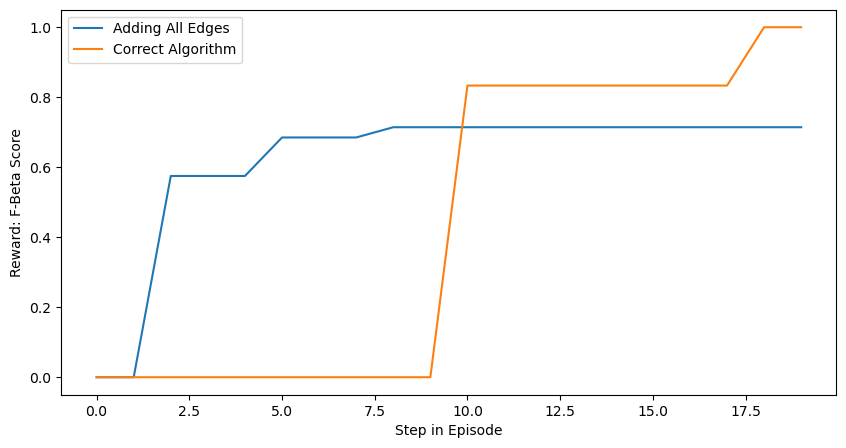

In [84]:
# create a plot where both are plotted into

plt.figure(figsize=(10, 5))
plot_reward(code3_false, n=3, label="Adding All Edges")
plot_reward(code3_correct, n=3, label="Correct Algorithm")
plt.legend()
plt.xlabel("Step in Episode")
plt.ylabel("Reward: F-Beta Score")
plt.show()

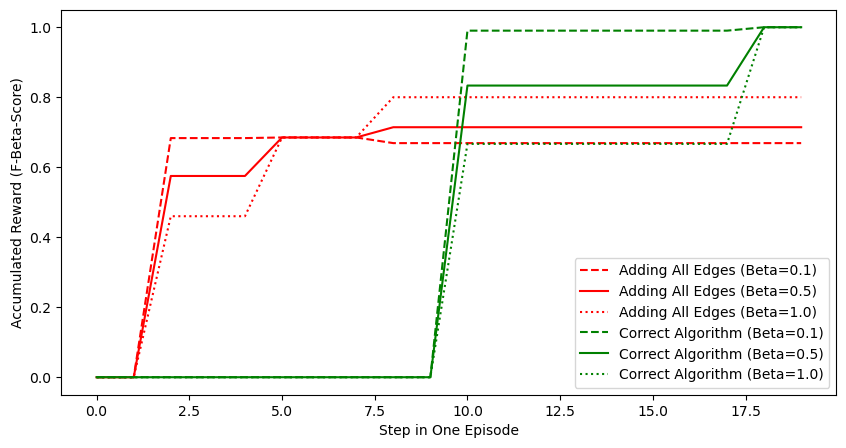

In [88]:
plt.figure(figsize=(10, 5))
plot_reward(code3_false, n=3, label="Adding All Edges (Beta=0.1)", beta=0.1, color="red", linestyle="--")
plot_reward(code3_false, n=3, label="Adding All Edges (Beta=0.5)", beta=0.5, color="red")
plot_reward(code3_false, n=3, label="Adding All Edges (Beta=1.0)", beta=1.0, color="red", linestyle=":")
plot_reward(code3_correct, n=3, label="Correct Algorithm (Beta=0.1)", beta=0.1, color="green", linestyle="--")
plot_reward(code3_correct, n=3, label="Correct Algorithm (Beta=0.5)", beta=0.5, color="green")
plot_reward(code3_correct, n=3, label="Correct Algorithm (Beta=1.0)", beta=1.0, color="green", linestyle=":")
plt.legend()
plt.xlabel("Step in One Episode")
plt.ylabel("Accumulated Reward (F-Beta-Score)")
plt.show()

In [34]:
from src.environment.commands import * 

# just add all three edges to the set
code4_false = [
    PUSH_LEGAL_EDGES,
    WRITE_EDGE_REGISTER,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    ADD_EDGE_TO_SET,
    POP_EDGE,
    WRITE_EDGE_REGISTER,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    # NOP,
    ADD_EDGE_TO_SET,
    POP_EDGE,
    WRITE_EDGE_REGISTER,
    # NOP,
    ADD_EDGE_TO_SET,
    POP_EDGE,
    WRITE_EDGE_REGISTER,
    # NOP,
    ADD_EDGE_TO_SET,
    POP_EDGE,
]

code4_correct = [
    PUSH_LEGAL_EDGES,
    RESET_EDGE_REGISTER,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    ADD_EDGE_TO_SET,
    
    # continue for 2nd edge
    PUSH_LEGAL_EDGES,
    RESET_EDGE_REGISTER,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    ADD_EDGE_TO_SET,

    # continue for 3rd edge
    PUSH_LEGAL_EDGES,
    RESET_EDGE_REGISTER,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    IF_EDGE_WEIGHT_LT,
    WRITE_EDGE_REGISTER,
    POP_EDGE,
    ADD_EDGE_TO_SET,
    RET,
]

code4_generated = [IF_EDGE_WEIGHT_LT, PUSH_LEGAL_EDGES, WRITE_EDGE_REGISTER, POP_EDGE, PUSH_LEGAL_EDGES, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, POP_EDGE, WRITE_EDGE_REGISTER, POP_EDGE, POP_EDGE, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, PUSH_LEGAL_EDGES, ADD_EDGE_TO_SET, WRITE_EDGE_REGISTER, POP_EDGE, IF_EDGE_WEIGHT_LT, WRITE_EDGE_REGISTER, ADD_EDGE_TO_SET, IF_EDGE_WEIGHT_LT, POP_EDGE, WRITE_EDGE_REGISTER, RESET_EDGE_REGISTER, PUSH_LEGAL_EDGES, ADD_EDGE_TO_SET, RET]

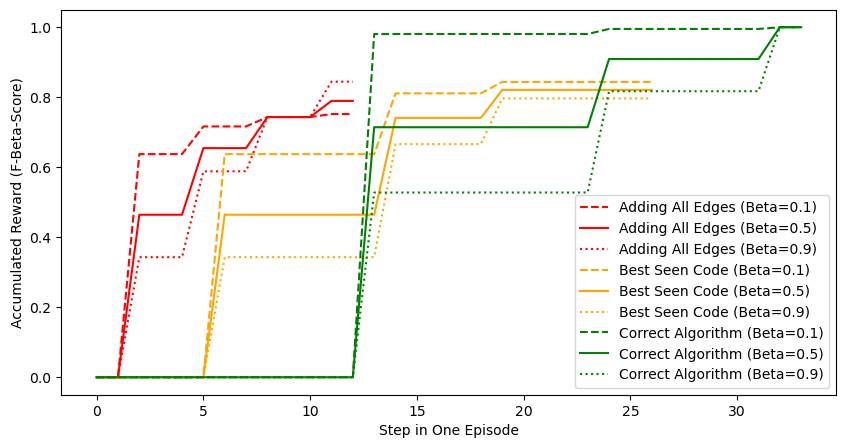

In [81]:
plt.figure(figsize=(10, 5))
plot_reward(code4_false, n=4, label="Adding All Edges (Beta=0.1)", beta=0.1, color="red", linestyle="--")
plot_reward(code4_false, n=4, label="Adding All Edges (Beta=0.5)", beta=0.5, color="red")
plot_reward(code4_false, n=4, label="Adding All Edges (Beta=0.9)", beta=0.9, color="red", linestyle=":")
plot_reward(code4_generated, n=4, label="Best Seen Code (Beta=0.1)", beta=0.1, color="orange", linestyle="--")
plot_reward(code4_generated, n=4, label="Best Seen Code (Beta=0.5)", beta=0.5, color="orange")
plot_reward(code4_generated, n=4, label="Best Seen Code (Beta=0.9)", beta=0.9, color="orange", linestyle=":")
plot_reward(code4_correct, n=4, label="Correct Algorithm (Beta=0.1)", beta=0.1, color="green", linestyle="--")
plot_reward(code4_correct, n=4, label="Correct Algorithm (Beta=0.5)", beta=0.5, color="green")
plot_reward(code4_correct, n=4, label="Correct Algorithm (Beta=0.9)", beta=0.9, color="green", linestyle=":")
plt.legend()
plt.xlabel("Step in One Episode")
plt.ylabel("Accumulated Reward (F-Beta-Score)")
plt.show()